In [1]:
import torch
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score,roc_curve, RocCurveDisplay, auc

c:\Users\Wen2Tee5\Desktop\MLProject\ML\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
to_N = 14
SPILT_RATIO = 0.8
VALIDATION_RATIO = 0.9
EPOCH = 20

In [3]:
class GRU_based(torch.nn.Module):

    def __init__(self, N = 7, bi = False) -> None:
        super(GRU_based, self).__init__()
        self.gru = torch.nn.GRU(input_size = 113, hidden_size = 113, batch_first = True, bidirectional = bi)
        if (bi):
            self.h_linear = torch.nn.Linear(113 * N * 2, 64)
        else:
            self.h_linear = torch.nn.Linear(113 * N, 64)
        self.o_linear = torch.nn.Linear(64, 1)
        

    def forward(self, x):
        h_s, _ = self.gru(x)
        h_f = torch.flatten(h_s, start_dim=1)
        h_f = torch.nn.functional.leaky_relu(h_f)
        h_f = self.h_linear(h_f)
        h_f = torch.nn.functional.leaky_relu(h_f)
        h_o = self.o_linear(h_f)
        return h_o

In [4]:
class LitModel(pl.LightningModule):

    def __init__(self, model : torch.nn.Module, learning_rate = 1e-5) -> None:
        super().__init__()
        self.lr = learning_rate
        self.loss_fn = torch.nn.BCEWithLogitsLoss()
        self.model = model
        self.test_correct_count = 0.
        self.test_total = 0.

    def forward(self, x):
        return self.model(x)
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        pred = self.model(x)
        loss = self.loss_fn(pred, y.unsqueeze(1))
        self.log("training_loss", loss, prog_bar=True, on_epoch = True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        with torch.no_grad():
            pred = self.model(x)
            val_loss = self.loss_fn(pred, y.unsqueeze(1))
            self.log("val_loss", val_loss , prog_bar=True, on_epoch = True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.model.parameters(), lr = self.lr)
        return optimizer

In [5]:
N_Acc = []
N_Precision = []
N_Recall = []
N_Macro_F1 = []

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 169 K 
----------------------------------------------
169 K     Trainable params
0         Non-trainable params
169 K     Total params
0.677     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 4024/4024 [00:18<00:00, 220.75it/s, loss=0.368, v_num=1, training_loss_step=0.445, val_loss=0.326, training_loss_epoch=0.333] 

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 4024/4024 [00:18<00:00, 220.63it/s, loss=0.368, v_num=1, training_loss_step=0.445, val_loss=0.326, training_loss_epoch=0.333]
Accuracy = 0.8900938412777329
Precision = 0.5951386298644784
Recall = 0.5003024000424751
Macro_F1 = 0.4717696120851347


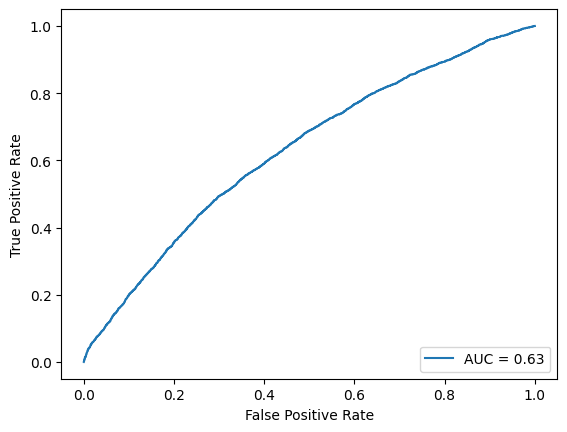

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 183 K 
----------------------------------------------
183 K     Trainable params
0         Non-trainable params
183 K     Total params
0.735     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 3584/3584 [00:17<00:00, 206.41it/s, loss=0.303, v_num=1, training_loss_step=0.409, val_loss=0.340, training_loss_epoch=0.345] 

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 3584/3584 [00:17<00:00, 206.29it/s, loss=0.303, v_num=1, training_loss_step=0.409, val_loss=0.340, training_loss_epoch=0.345]
Accuracy = 0.8794781456029581
Precision = 0.7434436308131269
Recall = 0.5022377355748986
Macro_F1 = 0.47278962594483637


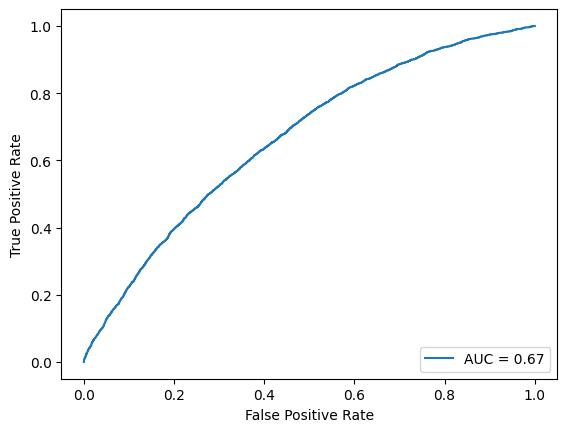

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 198 K 
----------------------------------------------
198 K     Trainable params
0         Non-trainable params
198 K     Total params
0.792     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 3154/3154 [00:15<00:00, 197.73it/s, loss=0.372, v_num=1, training_loss_step=0.394, val_loss=0.358, training_loss_epoch=0.355] 

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 3154/3154 [00:15<00:00, 197.61it/s, loss=0.372, v_num=1, training_loss_step=0.394, val_loss=0.358, training_loss_epoch=0.355]
Accuracy = 0.8701875421275921
Precision = 0.6659683738983961
Recall = 0.5007571224510831
Macro_F1 = 0.46711136375569473


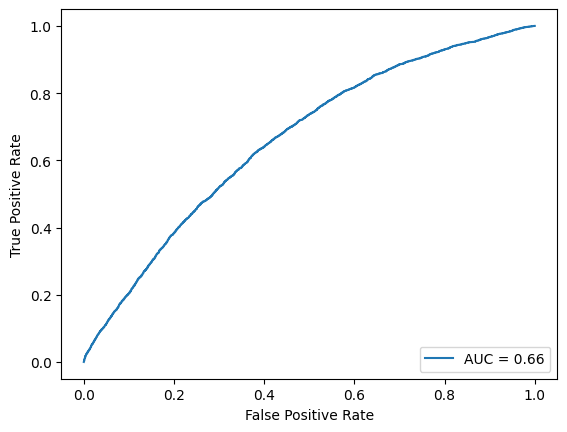

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 212 K 
----------------------------------------------
212 K     Trainable params
0         Non-trainable params
212 K     Total params
0.850     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 2753/2753 [00:14<00:00, 190.18it/s, loss=0.355, v_num=1, training_loss_step=0.462, val_loss=0.373, training_loss_epoch=0.368] 

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 2753/2753 [00:14<00:00, 190.04it/s, loss=0.355, v_num=1, training_loss_step=0.462, val_loss=0.373, training_loss_epoch=0.368]
Accuracy = 0.8661943044011445
Precision = 0.6331500999454842
Recall = 0.500260909244995
Macro_F1 = 0.46482459252560687


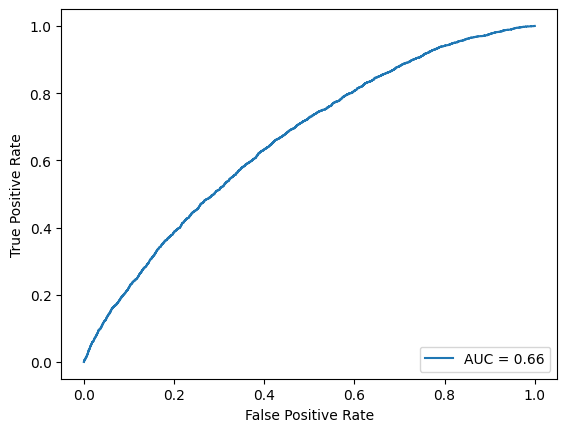

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 227 K 
----------------------------------------------
227 K     Trainable params
0         Non-trainable params
227 K     Total params
0.908     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 2386/2386 [00:13<00:00, 181.44it/s, loss=0.362, v_num=1, training_loss_step=0.128, val_loss=0.376, training_loss_epoch=0.376]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 2386/2386 [00:13<00:00, 181.26it/s, loss=0.362, v_num=1, training_loss_step=0.128, val_loss=0.376, training_loss_epoch=0.376]
Accuracy = 0.8601457252188499
Precision = 0.9300655307994757
Recall = 0.500374531835206
Macro_F1 = 0.4631519751770907


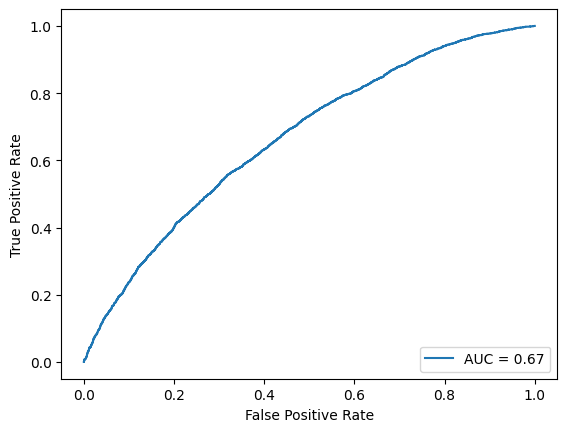

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 241 K 
----------------------------------------------
241 K     Trainable params
0         Non-trainable params
241 K     Total params
0.966     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 2053/2053 [00:11<00:00, 181.82it/s, loss=0.359, v_num=1, training_loss_step=0.093, val_loss=0.393, training_loss_epoch=0.381]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 2053/2053 [00:11<00:00, 181.63it/s, loss=0.359, v_num=1, training_loss_step=0.093, val_loss=0.393, training_loss_epoch=0.381]
Accuracy = 0.8550450889592981
Precision = 0.9275137111517368
Recall = 0.500419991600168
Macro_F1 = 0.46176368937673684


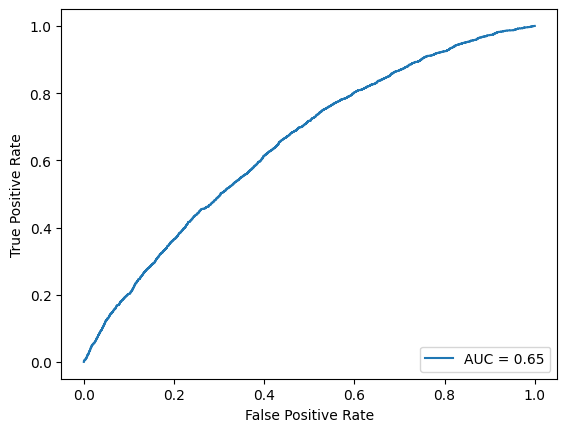

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 255 K 
----------------------------------------------
255 K     Trainable params
0         Non-trainable params
255 K     Total params
1.024     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 1759/1759 [00:10<00:00, 171.34it/s, loss=0.389, v_num=2, training_loss_step=0.520, val_loss=0.396, training_loss_epoch=0.381]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 1759/1759 [00:10<00:00, 171.14it/s, loss=0.389, v_num=2, training_loss_step=0.520, val_loss=0.396, training_loss_epoch=0.381]
Accuracy = 0.8554371002132196
Precision = 0.4277185501066098
Recall = 0.5
Macro_F1 = 0.46104343829004824


c:\Users\Wen2Tee5\Desktop\MLProject\ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


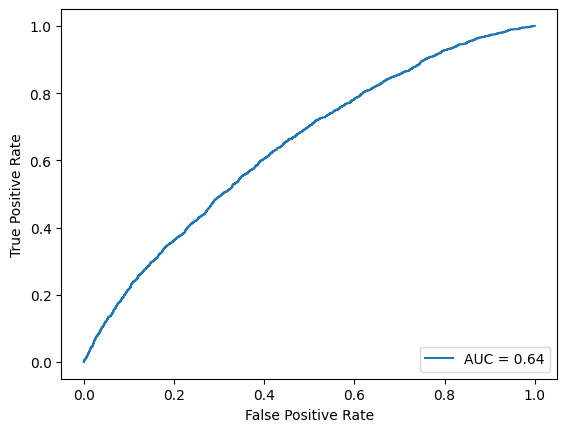

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 270 K 
----------------------------------------------
270 K     Trainable params
0         Non-trainable params
270 K     Total params
1.082     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 1508/1508 [00:09<00:00, 164.98it/s, loss=0.377, v_num=1, training_loss_step=0.438, val_loss=0.392, training_loss_epoch=0.383]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 1508/1508 [00:09<00:00, 164.73it/s, loss=0.377, v_num=1, training_loss_step=0.438, val_loss=0.392, training_loss_epoch=0.383]
Accuracy = 0.8545017410048085
Precision = 0.9272448387364232
Recall = 0.5002847380410023
Macro_F1 = 0.46133724781907565


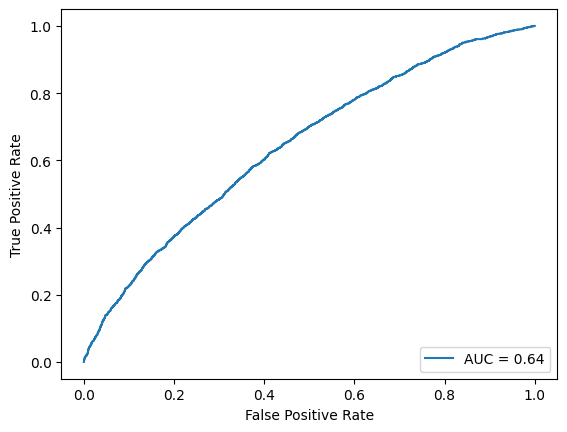

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 284 K 
----------------------------------------------
284 K     Trainable params
0         Non-trainable params
284 K     Total params
1.140     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 1294/1294 [00:08<00:00, 158.52it/s, loss=0.429, v_num=1, training_loss_step=0.878, val_loss=0.389, training_loss_epoch=0.381]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 1294/1294 [00:08<00:00, 158.28it/s, loss=0.429, v_num=1, training_loss_step=0.878, val_loss=0.389, training_loss_epoch=0.381]
Accuracy = 0.8562862669245648
Precision = 0.4281431334622824
Recall = 0.5
Macro_F1 = 0.46128998645410024


c:\Users\Wen2Tee5\Desktop\MLProject\ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


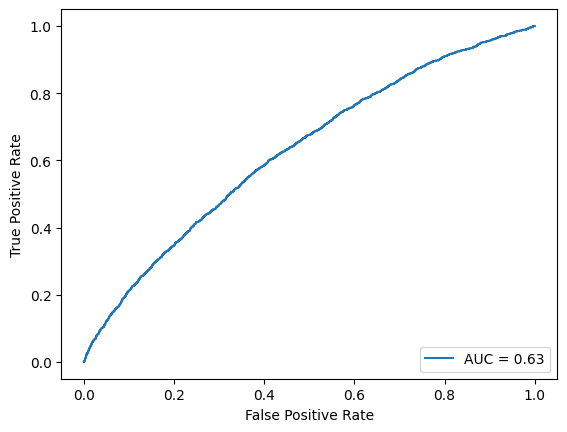

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 299 K 
----------------------------------------------
299 K     Trainable params
0         Non-trainable params
299 K     Total params
1.197     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 1110/1110 [00:07<00:00, 152.47it/s, loss=0.384, v_num=1, training_loss_step=0.382, val_loss=0.388, training_loss_epoch=0.380]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 1110/1110 [00:07<00:00, 152.22it/s, loss=0.384, v_num=1, training_loss_step=0.382, val_loss=0.388, training_loss_epoch=0.380]
Accuracy = 0.859009009009009
Precision = 0.4295045045045045
Recall = 0.5
Macro_F1 = 0.4620789920038769


c:\Users\Wen2Tee5\Desktop\MLProject\ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


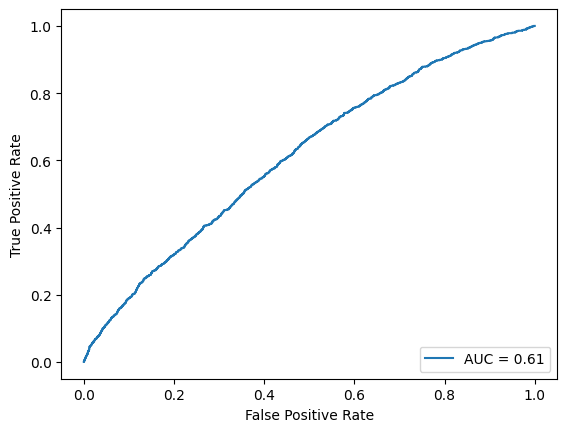

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 313 K 
----------------------------------------------
313 K     Trainable params
0         Non-trainable params
313 K     Total params
1.255     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 955/955 [00:06<00:00, 148.06it/s, loss=0.357, v_num=1, training_loss_step=0.440, val_loss=0.391, training_loss_epoch=0.383]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 955/955 [00:06<00:00, 147.65it/s, loss=0.357, v_num=1, training_loss_step=0.440, val_loss=0.391, training_loss_epoch=0.383]
Accuracy = 0.8635411210057622
Precision = 0.4317705605028811
Recall = 0.5
Macro_F1 = 0.46338721011946593


c:\Users\Wen2Tee5\Desktop\MLProject\ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


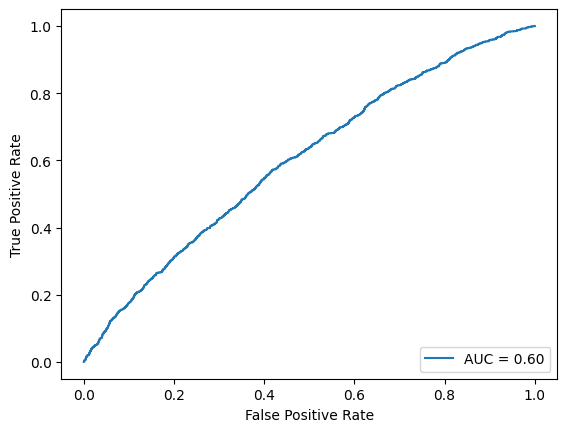

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 328 K 
----------------------------------------------
328 K     Trainable params
0         Non-trainable params
328 K     Total params
1.313     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 823/823 [00:06<00:00, 134.49it/s, loss=0.409, v_num=1, training_loss_step=1.540, val_loss=0.398, training_loss_epoch=0.385]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 823/823 [00:06<00:00, 134.21it/s, loss=0.409, v_num=1, training_loss_step=1.540, val_loss=0.398, training_loss_epoch=0.385]
Accuracy = 0.8595129375951294
Precision = 0.4297564687975647
Recall = 0.5
Macro_F1 = 0.46222476876483587


c:\Users\Wen2Tee5\Desktop\MLProject\ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


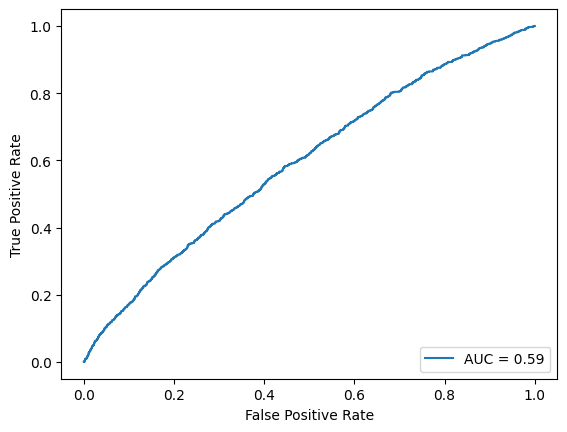

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 342 K 
----------------------------------------------
342 K     Trainable params
0         Non-trainable params
342 K     Total params
1.371     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 706/706 [00:05<00:00, 128.27it/s, loss=0.399, v_num=1, training_loss_step=0.690, val_loss=0.405, training_loss_epoch=0.385]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 706/706 [00:05<00:00, 127.99it/s, loss=0.399, v_num=1, training_loss_step=0.690, val_loss=0.405, training_loss_epoch=0.385]
Accuracy = 0.859092520382843
Precision = 0.4295462601914215
Recall = 0.5
Macro_F1 = 0.4621031556869101


c:\Users\Wen2Tee5\Desktop\MLProject\ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


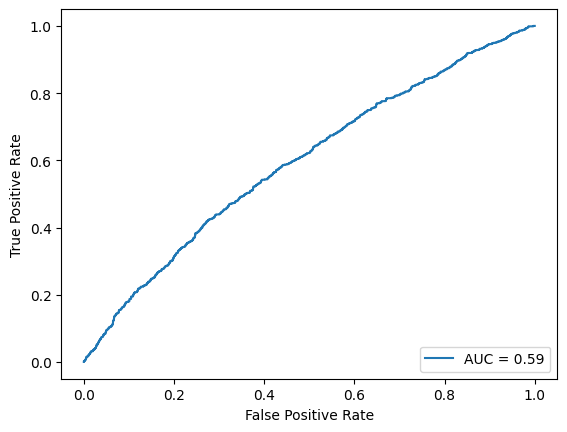

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type              | Params
----------------------------------------------
0 | loss_fn | BCEWithLogitsLoss | 0     
1 | model   | GRU_based         | 357 K 
----------------------------------------------
357 K     Trainable params
0         Non-trainable params
357 K     Total params
1.429     Total estimated model params size (MB)


Epoch 19: 100%|██████████| 607/607 [00:05<00:00, 119.14it/s, loss=0.444, v_num=1, training_loss_step=0.854, val_loss=0.396, training_loss_epoch=0.390]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 19: 100%|██████████| 607/607 [00:05<00:00, 118.81it/s, loss=0.444, v_num=1, training_loss_step=0.854, val_loss=0.396, training_loss_epoch=0.390]
Accuracy = 0.8598844407758977
Precision = 0.4299422203879488
Recall = 0.5
Macro_F1 = 0.46233218684122934


c:\Users\Wen2Tee5\Desktop\MLProject\ML\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


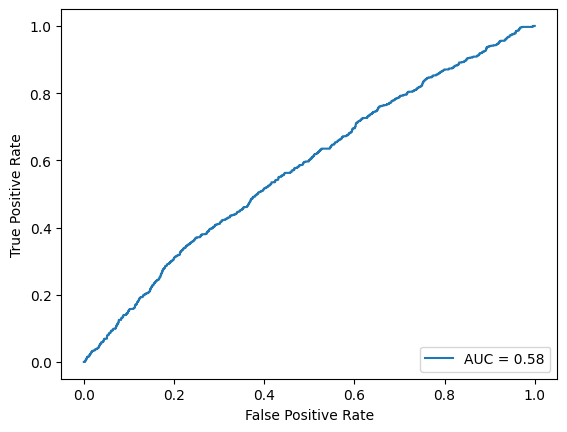

In [6]:
for N in range(1, to_N + 1):
    x_data = np.load(f'./bindata/{N}-frame_x_data.npy', allow_pickle=True)
    y_data = np.load(f'./bindata/{N}-frame_y_data.npy', allow_pickle=True)
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size = SPILT_RATIO, shuffle = True, random_state = 76)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = VALIDATION_RATIO, shuffle = True, random_state = 76)
    trainDataset = TensorDataset(torch.tensor(x_train), torch.tensor(y_train, dtype=torch.float32))
    trainLoader = DataLoader(dataset=trainDataset, num_workers = 4, batch_size=32, shuffle=True)
    testDataset = TensorDataset(torch.tensor(x_test), torch.tensor(y_test, dtype=torch.int64))
    testLoader = DataLoader(dataset=testDataset, batch_size = len(testDataset))
    valDataset = TensorDataset(torch.tensor(x_val), torch.tensor(y_val, dtype=torch.float32))
    valLoader = DataLoader(dataset=valDataset, num_workers = 4, batch_size=32)
    test_x, test_y = next(iter(testLoader))
    bi_gru_based = LitModel(model = GRU_based(N = N, bi = True))
    bi_gru_trainer = pl.Trainer(accelerator='gpu', max_epochs = EPOCH, logger=TensorBoardLogger(save_dir='./lightning_logs', name=f"{N}_days_BIGRU_based"))
    bi_gru_trainer.fit(model = bi_gru_based, train_dataloaders = trainLoader, val_dataloaders = valLoader)
    with torch.no_grad():
        bi_gru_based.eval()
        pred_y = bi_gru_based(test_x).squeeze(1)
        pred_y = torch.sigmoid(pred_y)
        result_y = (pred_y > 0.5).long()
        acc = accuracy_score(y_pred = result_y, y_true = test_y)
        precision = precision_score(y_pred = result_y, y_true = test_y, average = 'macro')
        recall = recall_score(y_pred = result_y, y_true = test_y, average = 'macro')
        macro_f1 = f1_score(y_pred = result_y, y_true = test_y, average = 'macro')
        print(f"Accuracy = {acc}")
        N_Acc.append(acc)
        print(f"Precision = {precision}")
        N_Precision.append(precision)
        print(f"Recall = {recall}")
        N_Recall.append(recall)
        print(f"Macro_F1 = {macro_f1}")
        N_Macro_F1.append(macro_f1)
        fpr, tpr, _ = roc_curve(y_true = test_y, y_score = pred_y)
        auc_score = auc(fpr, tpr)
        display_roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = auc_score)
        display_roc.plot()
        plt.show()

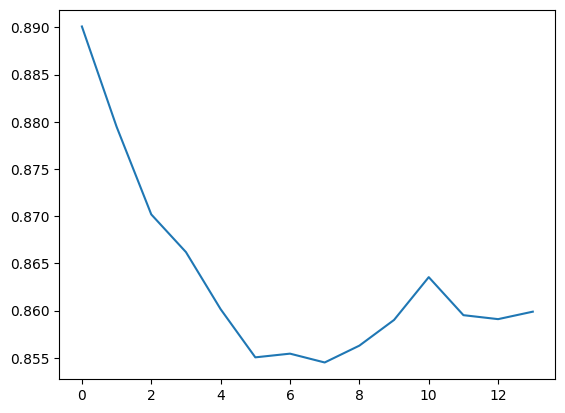

In [7]:
plt.plot(N_Acc)
plt.show()

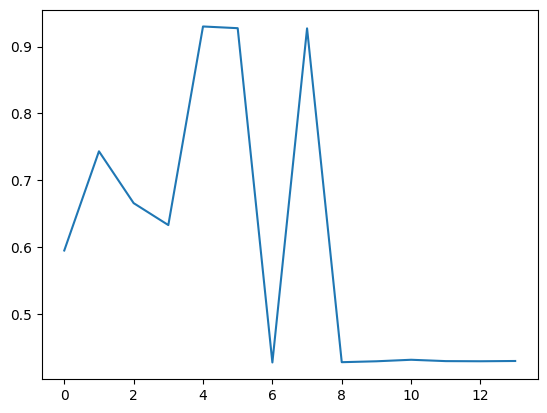

In [8]:
plt.plot(N_Precision)
plt.show()

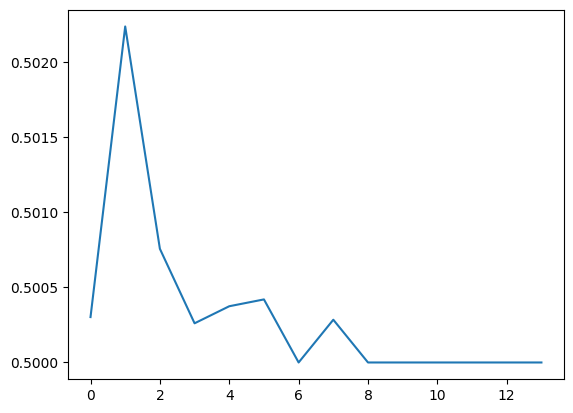

In [9]:
plt.plot(N_Recall)
plt.show()

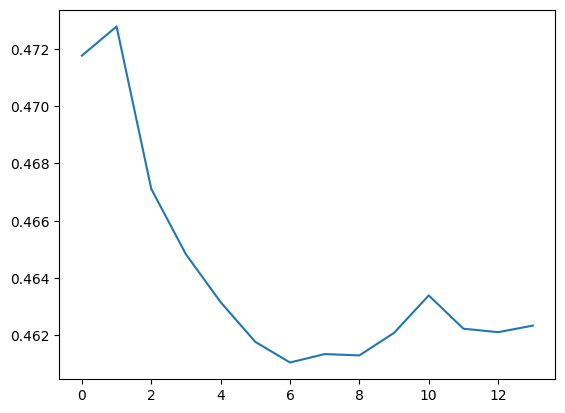

In [10]:
plt.plot(N_Macro_F1)
plt.show()